**CODSOFT INTERNSHIP**

TASK 1: TITANIC SURVIVAL PREDICTION

by: Yogendra Patel

# ***Let's Begin !***

### Import Libraries

In [28]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### Dataset Loading

In [29]:
# Load Dataset
titanic_data = pd.read_csv('Titanic-Dataset.csv')

### Dataset First View

In [30]:
# Dataset First Look
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dataset Rows & Columns count

In [31]:
# Dataset Rows & Columns count
titanic_data.shape

(891, 12)

### Dataset Information

In [32]:
# Dataset Info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Duplicate Values

In [33]:
# Dataset Duplicate Value Count
num_duplicate_rows = titanic_data.duplicated().sum()

# Display the number of duplicate rows
print("Number of Duplicate Rows in the Titanic dataset:", num_duplicate_rows)

Number of Duplicate Rows in the Titanic dataset: 0


#### Missing Values/Null Values

In [34]:
# Missing Values/Null Values Count
missing_values_count = titanic_data.isnull().sum()
# Display the missing values count for each column
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


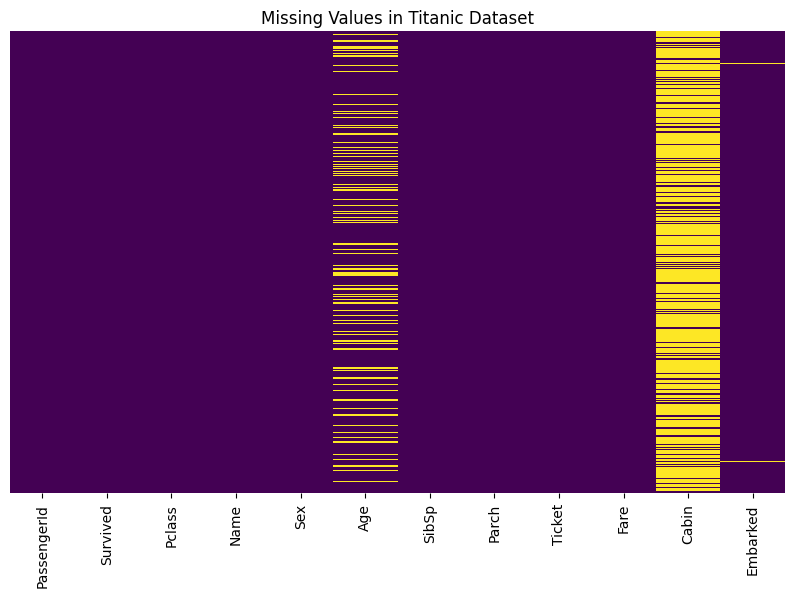

In [35]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in Titanic Dataset')
plt.show()

In [36]:
# Dataset Columns
# Get the list of columns
columns_list = titanic_data.columns

# Display the list of columns
print("Columns in the Titanic dataset:")
for column in columns_list:
    print(column)

Columns in the Titanic dataset:
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [37]:
# Dataset Describe
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check Unique Values for each variable.

In [38]:
# Check Unique Values for each variable.
# Iterate through each column and print unique values
for column in titanic_data.columns:
    unique_values = titanic_data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'PassengerId':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 23

***Data Wrangling***

In [39]:
# Impute missing values for Age with mean
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# Impute missing values for Embarked with mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column
titanic_data.drop('Cabin', axis=1, inplace=True)

# Verify that missing values have been handled
missing_values_after_handling = titanic_data.isnull().sum()
print("Missing Values Count after handling:")
print(missing_values_after_handling)


Missing Values Count after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2240\2006294320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2240\2006294320.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [40]:
# Count of survivors and non-survivors by sex
survival_count_by_sex = titanic_data.groupby(['Sex', 'Survived']).size().unstack()
print("\nSurvival Count by Sex:")
print(survival_count_by_sex)


Survival Count by Sex:
Survived    0    1
Sex               
female     81  233
male      468  109


## 4. ***EDA (Exploratory data Analysis)***

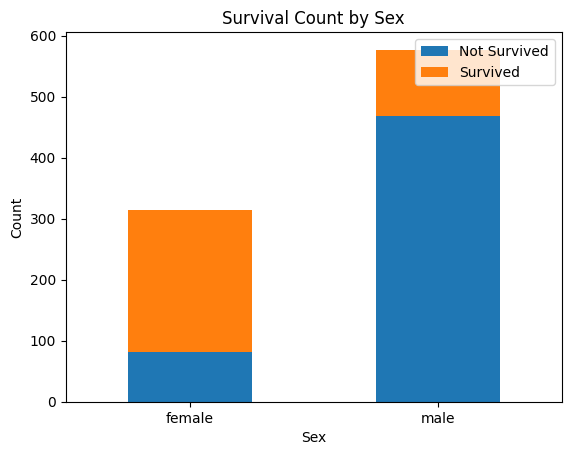

In [41]:
# Visualizing survival count by sex
survival_count_by_sex.plot(kind='bar', stacked=True)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

In [42]:
# Count of survivors and non-survivors by passenger class
survival_count_by_class = titanic_data.groupby(['Pclass', 'Survived']).size().unstack()
print("\nSurvival Count by Passenger Class:")
print(survival_count_by_class)


Survival Count by Passenger Class:
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


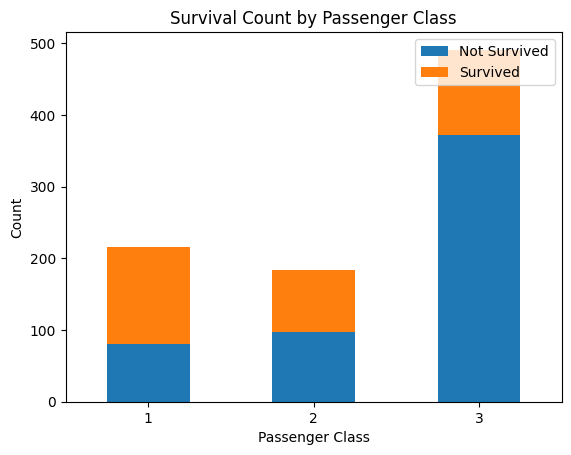

In [43]:
# Visualizing survival count by passenger class
survival_count_by_class.plot(kind='bar', stacked=True)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()


In [44]:
# Count of survivors and non-survivors by port of embarkation
survival_count_by_embarkation = titanic_data.groupby(['Embarked', 'Survived']).size().unstack()
print("\nSurvival Count by Port of Embarkation:")
print(survival_count_by_embarkation)


Survival Count by Port of Embarkation:
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219


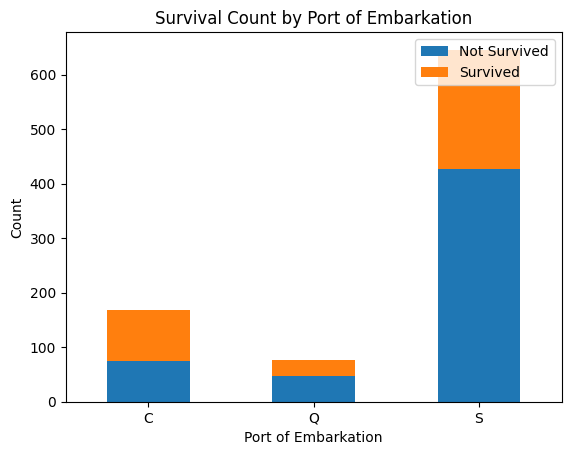

In [45]:
# Visualizing survival count by port of embarkation
survival_count_by_embarkation.plot(kind='bar', stacked=True)
plt.title('Survival Count by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

## ***Feature Engineering***

In [46]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

##  ***Model Building***

In [47]:
# Split the data into features and target variable
X = titanic_data.drop(['Survived', 'Name', 'Ticket'], axis=1)
Y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [48]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [49]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


In [50]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, Y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##  ***Model Evaluation***

In [51]:
# Make predictions
y_pred = model.predict(X_test)

#Evaluation of the Model
#Accuracy Score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [52]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [53]:
print(Y_test)

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64


In [54]:
# Predict survival on the test set
X_test_prediction = model.predict(X_test)

# Calculate the survival rate
survival_rate = X_test_prediction.mean()

# Check if survival rate is less than 1
if survival_rate < 1:
    print("Congratulations! You survived.")
else:
    print("I'm sorry, but you have failed to survive.")


Congratulations! You survived.


In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [57]:
# Make predictions
y_pred = rf.predict(X_test)

#Evaluation of the Model
#Accuracy Score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8435754189944135
